In [44]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install tensorflow
# !pip install missingno

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

warnings.filterwarnings('ignore')

# 1. Section One: Wine Quality Classifiers

## A. Loading Wine Dataset

In [46]:
df_red = pd.read_csv("../data/wine+quality/winequality-red.csv", delimiter=";")

## B. EDA

Starting data exploration & analysis to prepare dataset for model training

In [47]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [49]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


It appears that the quality values of 1, 2, 9 & 10 are missing and no wine has these quality assigned to them

In [50]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the datatypes seem to be in order and no need for type conversions

Further, checking for the ranges of values in data features

Text(0.5, 1.0, 'Range of all columns')

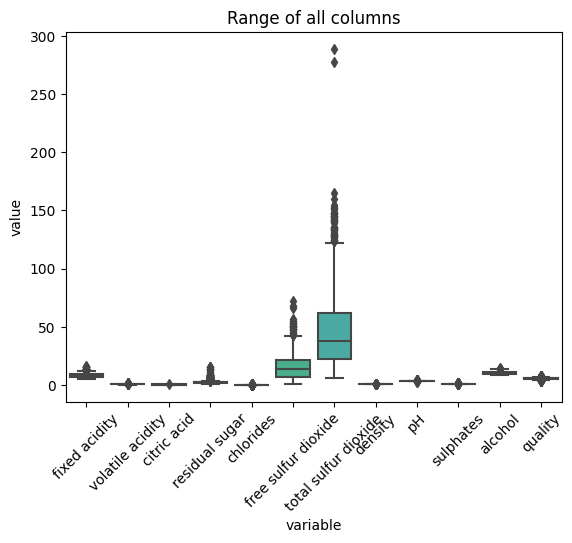

In [51]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_red))
plt.xticks(rotation=45)
plt.title("Range of all columns")

checking for null values within each data feature

In [52]:
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

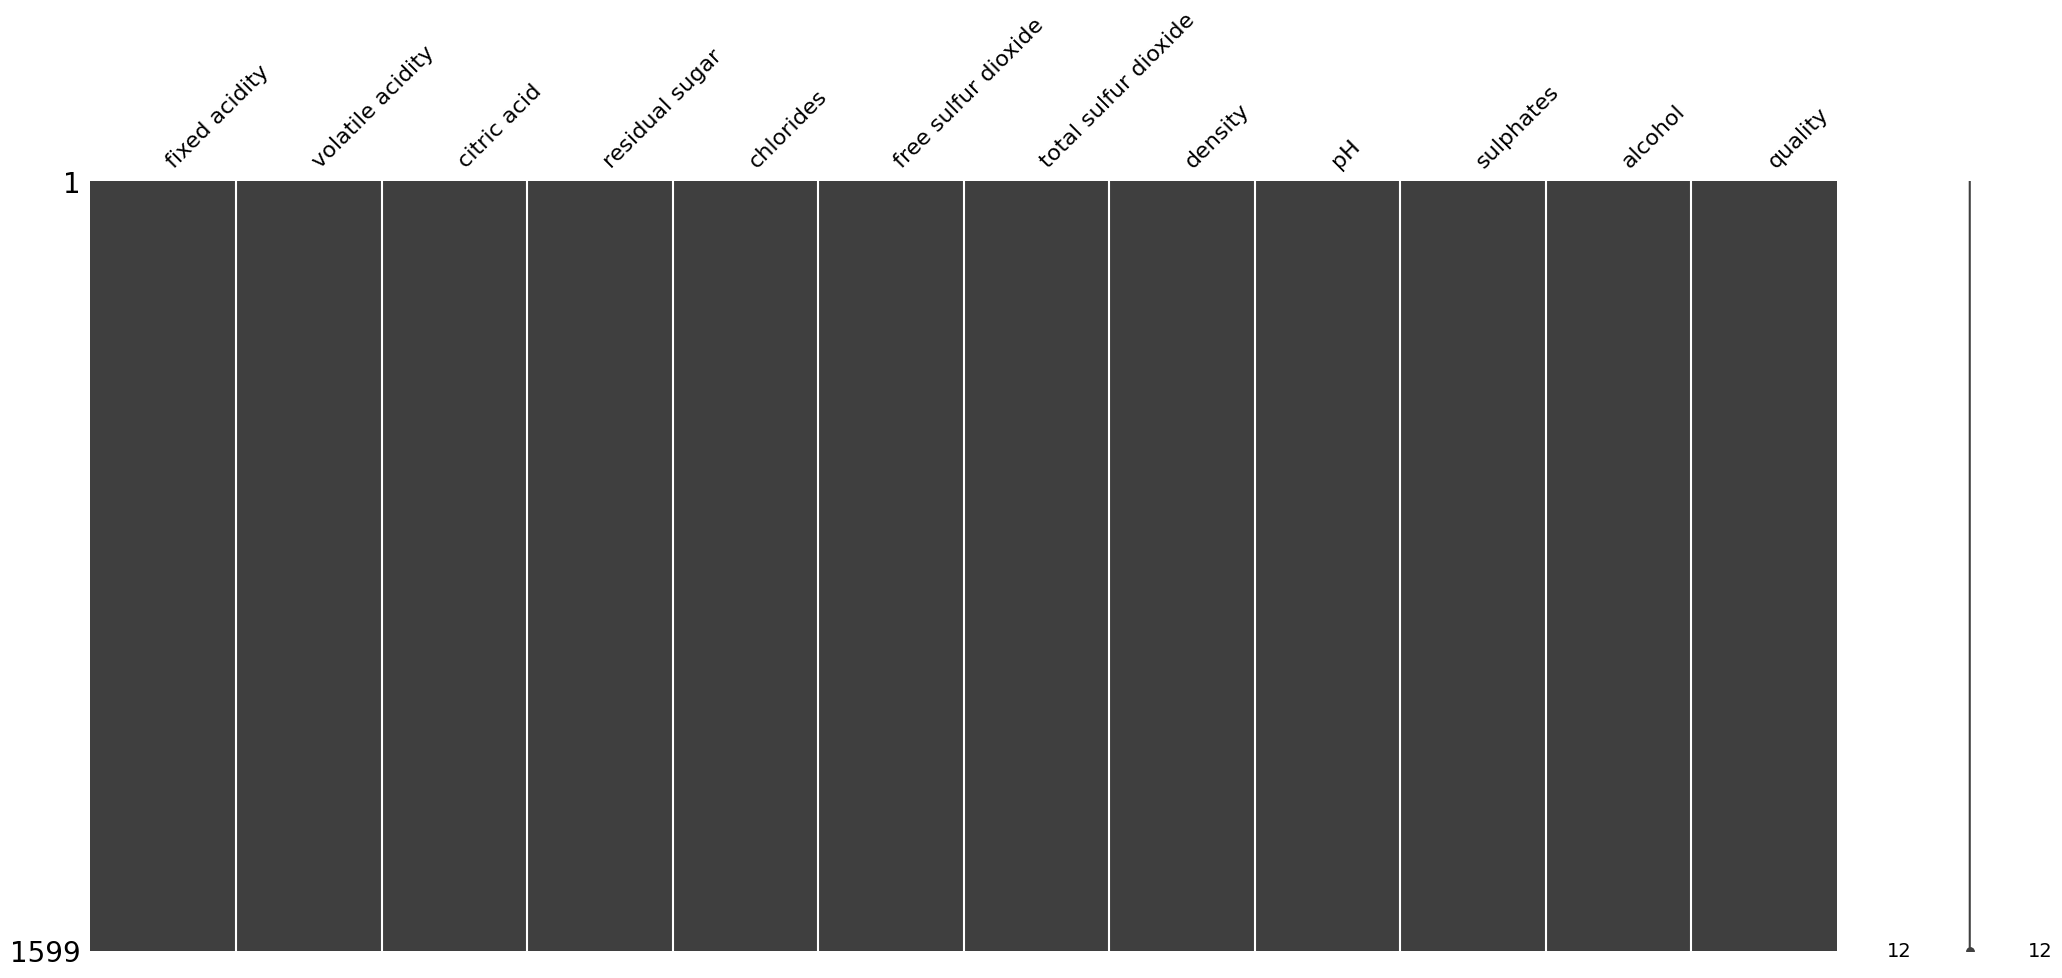

In [53]:
msno.matrix(df_red)

The dataset appears to be complete with no missing or null values.

Looking for correlated features with the dataset

In [54]:
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Build a plot function to plot the correlation matrix for the dataset

In [55]:
# Function to visualize correlation matrix
def plot_corr(dataframe:pd.DataFrame, title:str, figsize:tuple=(6,6), tickfont:int=9, tickrotation:int=90, ticklabelsize:int=14, titlefont:int=16) -> None:
    f = plt.figure(figsize=figsize)
    plt.matshow(dataframe.corr(), fignum=f.number, cmap="Blues")
    plt.xticks(range(dataframe.select_dtypes(['number']).shape[1]),
               dataframe.select_dtypes(['number']).columns,
               fontsize=tickfont,
               rotation=tickrotation)
    plt.yticks(range(dataframe.select_dtypes(['number']).shape[1]),
               dataframe.select_dtypes(['number']).columns,
               fontsize=tickfont)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=ticklabelsize)
    plt.title(title,fontsize=titlefont)

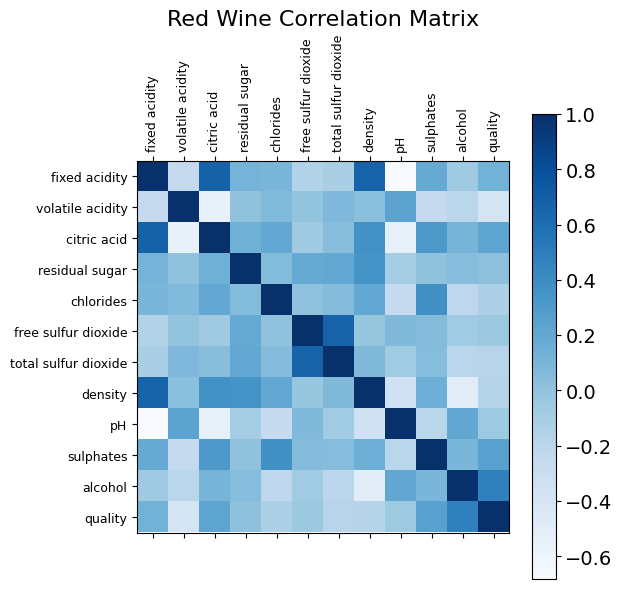

In [56]:
plot_corr(df_red, "Red Wine Correlation Matrix")

# Loading libraries and building utility functions to use later

In [57]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Making numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)
tf.random.set_seed(10)

Building function to plot the performance of the model

In [58]:
def plot_model_performance(history, metrics):
    
    cols = len(metrics)
    y = 2 * cols
    x = 3 * y
    fig, axs = plt.subplots(1, cols, figsize=(x, y))
    fig.suptitle('Model Performance')

    for metric, ax in zip(metrics, axs):
        val_metric = "val_" + metric
        ax.plot(history.history[metric])
        ax.plot(history.history[val_metric])
        ax.set_title("model " + metric)
        ax.set_ylabel(metric)
        ax.set_xlabel("epoch")
        ax.legend(["train", "validation"], loc="upper left")

Building function to report and plot confusion matrix

In [59]:
def cm_report(y_test:np.array, y_pred:np.array, labels:list, cmap:str=None) -> None:
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap=cmap)
    plt.title("Confusion Matrix")
    print(classification_report(y_test, y_pred))

## C. Data Preprocessing

Loading the data values and targets for the wine quality dataset<br>
Using encoders to encode the target values (tried two encoders one hot encoding & label encoding - decided to use one hot encoding)

In [60]:
X = df_red[df_red.columns.difference(["quality"])]
y = df_red["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=10)

# One Hot Encoder
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Label Encoder (Alternative method of encoding)
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# y_train = label_encoder.transform(y_train)
# y_test = label_encoder.transform(y_test)

labels = [ "3", "4", "5", "6", "7", "8"]

In [61]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
X_train.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
1575,11.8,0.060,0.40,0.99474,7.5,12.0,3.26,2.2,0.64,20.0,0.520
336,12.5,0.052,0.45,0.99480,8.9,6.0,3.35,1.9,0.70,16.0,0.430
1268,9.5,0.079,0.31,0.99668,6.9,21.0,3.47,2.0,0.55,51.0,0.410
1294,10.9,0.073,0.10,0.99638,8.2,25.0,3.29,2.1,0.75,60.0,0.635
1346,11.4,0.056,0.01,0.99472,6.1,5.0,3.52,2.1,0.56,13.0,0.590


### Initializing the normalization layer and using train data to fit

In [63]:
normalize = preprocessing.Normalization()

In [64]:
normalize.adapt(X_train)

## D. Building Model 1

## Function to build a custom two layer NN classifier

In [65]:
def two_layer_NN(normalizer, layer_1_neurons, layer_2_neurons, hidden_activation, output_neurons, output_activation, optimizer, loss, metrics):
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(layer_1_neurons, activation=hidden_activation),
        layers.Dense(layer_2_neurons, activation=hidden_activation),
        layers.Dense(output_neurons, activation=output_activation)
    ])

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

Setting all the constant parameters for the classifier models

Building the first classifier with 16 & 8 parameters in the  Hidden layers

In [66]:
optimizer = tf.optimizers.legacy.Adam()
# loss = tf.losses.SparseCategoricalCrossentropy()
loss = 'categorical_crossentropy'
metrics = ["accuracy", tf.keras.metrics.F1Score(average='macro')]
cmap = "Blues"

hidden_activation = "relu"
output_activation = "softmax"
output_neurons = 10
num_epochs = 30

metrics_keys = ["accuracy", "loss", "f1_score"]

In [67]:
norm_wine_classifier_1 = two_layer_NN(normalize, 16, 8, hidden_activation, output_neurons, output_activation, optimizer, loss, metrics)

In [68]:
norm_wine_classifier_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 11)                23        
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 16)                192       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 10)                90        
                                                                 
Total params: 441 (1.73 KB)
Trainable params: 418 (1.63 KB)
Non-trainable params: 23 (96.00 Byte)
_________________________________________________________________


Training & evaluating the first classifier model

In [69]:
training_history_m1 = norm_wine_classifier_1.fit(X_train, 
                                            y_train, 
                                            epochs=num_epochs,
                                            batch_size=128,
                                            validation_split=0.2)

Epoch 1/30
8/8 [==============================] - 0s 15ms/step - loss: 2.3465 - accuracy: 0.0886 - f1_score: 0.0297 - val_loss: 2.3635 - val_accuracy: 0.1250 - val_f1_score: 0.0370
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 2.2782 - accuracy: 0.1700 - f1_score: 0.0489 - val_loss: 2.2976 - val_accuracy: 0.2042 - val_f1_score: 0.0473
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 2.2157 - accuracy: 0.2711 - f1_score: 0.0629 - val_loss: 2.2384 - val_accuracy: 0.3000 - val_f1_score: 0.0590
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 2.1569 - accuracy: 0.3233 - f1_score: 0.0664 - val_loss: 2.1826 - val_accuracy: 0.3333 - val_f1_score: 0.0586
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 2.0996 - accuracy: 0.3618 - f1_score: 0.0690 - val_loss: 2.1279 - val_accuracy: 0.3833 - val_f1_score: 0.0622
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 2.0429 - accuracy: 0.3796 - f

In [70]:
norm_wine_classifier_1.evaluate(X_test, y_test)

13/13 [==============================] - 0s 734us/step - loss: 1.1236 - accuracy: 0.5575 - f1_score: 0.1190


[1.1235634088516235, 0.5575000047683716, 0.11900444328784943]

In [71]:
y_pred_m1 = (norm_wine_classifier_1.predict(X_test))
y_pred_m1 = np.argmax(y_pred_m1, axis=1)

y_test_m1 = np.argmax(y_test, axis=1)

# If using Label Encoder
# y_pred_m1 = label_encoder.inverse_transform(y_pred_m1)
# y_test_m1 = label_encoder.inverse_transform(y_test)

13/13 [==============================] - 0s 496us/step


In [72]:
training_history_m1.history.keys()

dict_keys(['loss', 'accuracy', 'f1_score', 'val_loss', 'val_accuracy', 'val_f1_score'])

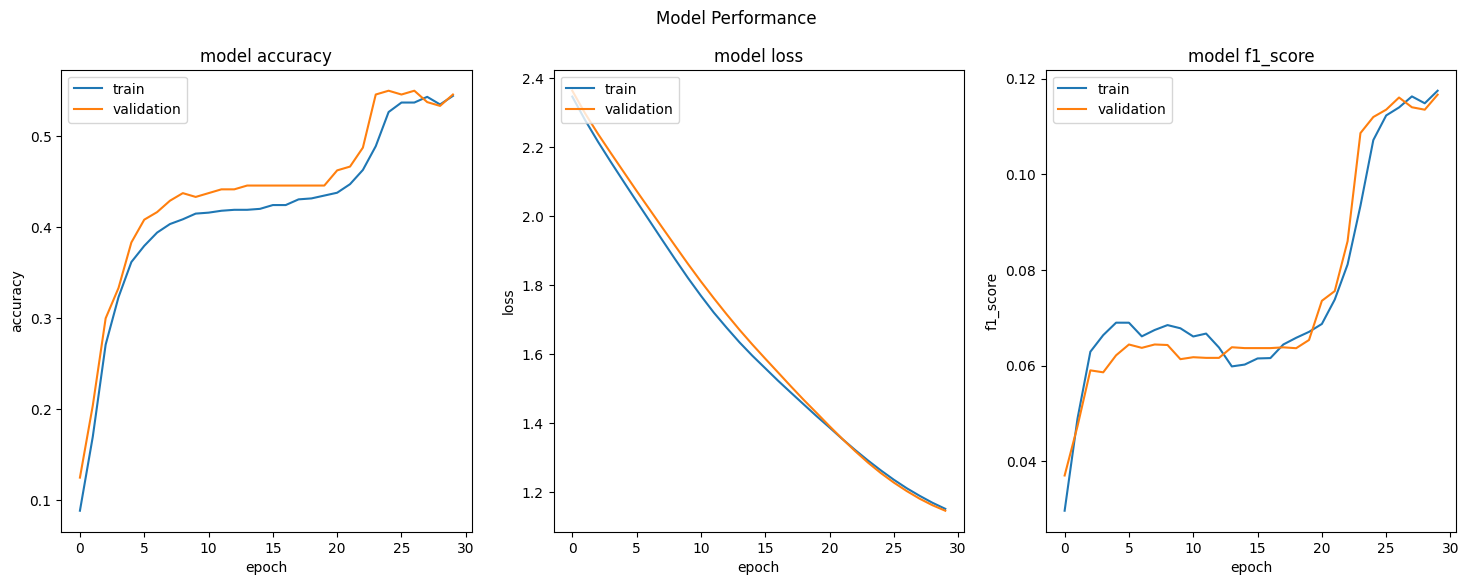

In [73]:
plot_model_performance(training_history_m1, metrics_keys)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.57      0.87      0.69       170
           6       0.54      0.47      0.50       160
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         5

    accuracy                           0.56       400
   macro avg       0.18      0.22      0.20       400
weighted avg       0.46      0.56      0.49       400



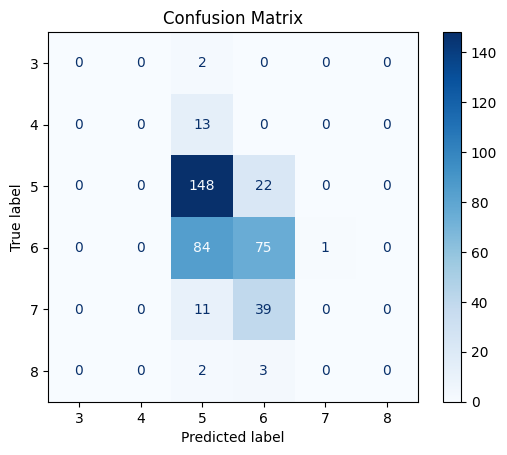

In [74]:
cm_report(y_test_m1, y_pred_m1, labels, cmap)

## E. Building Model 2

Building the second classifier with 32 & 16 parameters in the Hidden layers (Double parameters from the first model)

In [75]:
norm_wine_classifier_2 = two_layer_NN(normalize, 32, 16, hidden_activation, output_neurons, output_activation, optimizer, loss, metrics)

In [76]:
norm_wine_classifier_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 11)                23        
 tion)                                                           
                                                                 
 dense_9 (Dense)             (None, 32)                384       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 1105 (4.32 KB)
Trainable params: 1082 (4.23 KB)
Non-trainable params: 23 (96.00 Byte)
_________________________________________________________________


Training & evaluating the second classifier model

In [77]:
training_history_m2 = norm_wine_classifier_2.fit(X_train, 
                                            y_train, 
                                            epochs=num_epochs,
                                            batch_size=128,
                                            validation_split=0.2)

Epoch 1/30
8/8 [==============================] - 0s 15ms/step - loss: 2.2290 - accuracy: 0.1867 - f1_score: 0.0850 - val_loss: 2.0297 - val_accuracy: 0.3792 - val_f1_score: 0.0884
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 1.9167 - accuracy: 0.4213 - f1_score: 0.1077 - val_loss: 1.7156 - val_accuracy: 0.4625 - val_f1_score: 0.1096
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 1.6150 - accuracy: 0.4651 - f1_score: 0.1247 - val_loss: 1.4531 - val_accuracy: 0.5125 - val_f1_score: 0.1370
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 1.3770 - accuracy: 0.5016 - f1_score: 0.1437 - val_loss: 1.2675 - val_accuracy: 0.5500 - val_f1_score: 0.1496
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 1.2306 - accuracy: 0.5339 - f1_score: 0.1506 - val_loss: 1.1611 - val_accuracy: 0.5500 - val_f1_score: 0.1502
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 1.1495 - accuracy: 0.5652 - f

In [78]:
norm_wine_classifier_2.evaluate(X_test, y_test)

13/13 [==============================] - 0s 688us/step - loss: 0.9308 - accuracy: 0.6200 - f1_score: 0.2070


[0.9307634830474854, 0.6200000047683716, 0.20699234306812286]

In [79]:
y_pred_m2 = (norm_wine_classifier_2.predict(X_test))
y_pred_m2 = np.argmax(y_pred_m2, axis=1)

y_test_m2 = np.argmax(y_test, axis=1)

# If using Label Encoder
# y_pred_m2 = label_encoder.inverse_transform(y_pred_m2)
# y_test_m2 = label_encoder.inverse_transform(y_test)

13/13 [==============================] - 0s 511us/step


In [80]:
training_history_m2.history.keys()

dict_keys(['loss', 'accuracy', 'f1_score', 'val_loss', 'val_accuracy', 'val_f1_score'])

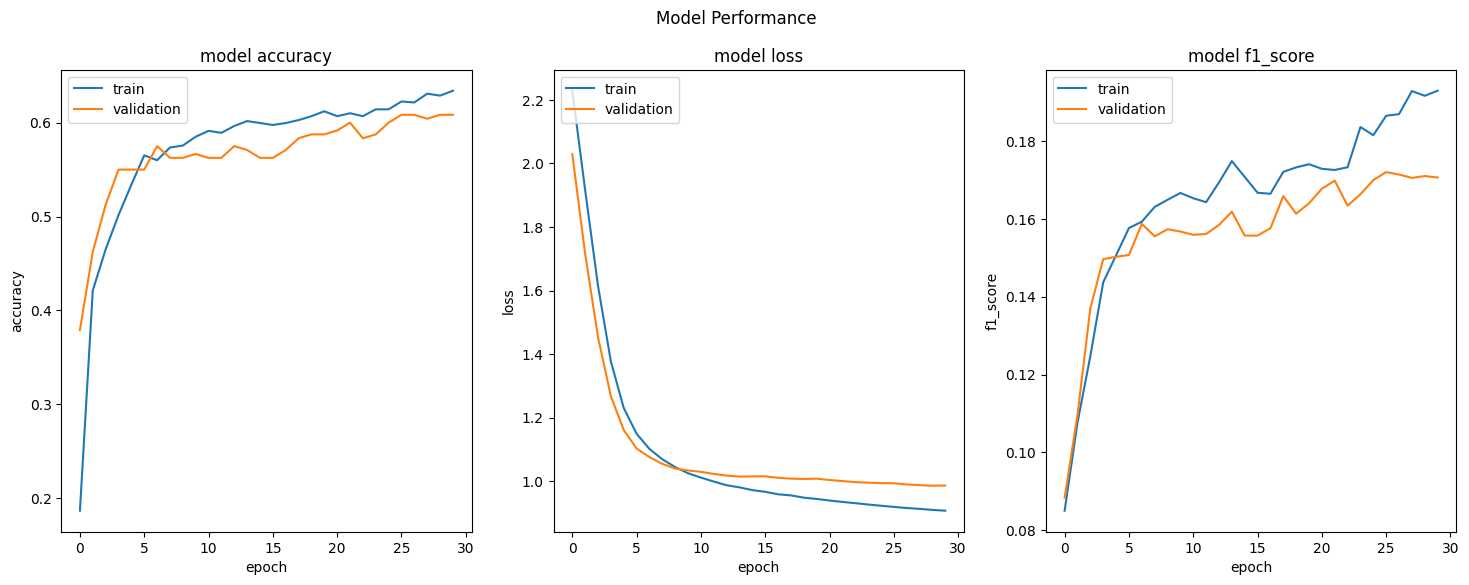

In [81]:
plot_model_performance(training_history_m2, metrics_keys)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.15      0.27        13
           5       0.67      0.76      0.71       170
           6       0.57      0.58      0.57       160
           7       0.59      0.46      0.52        50
           8       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.47      0.33      0.34       400
weighted avg       0.62      0.62      0.61       400



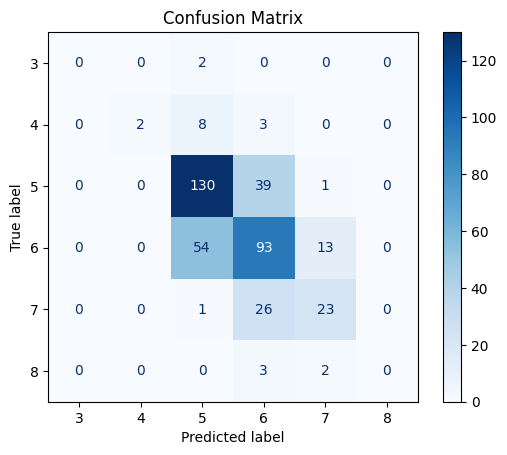

In [82]:
cm_report(y_test_m2, y_pred_m2, labels, cmap)

## Comparison between both the wine quality classifiers

1. The first classifier has accuracy of ~56% whereas the second classifier has an accuracy of ~62%.
2. The f1-scores of these models (macro, weighted avg) are (0.20, 0.49) & (0.34, 0.61) respectively.
3. We can clearly see that the second model has improved slightly from the first model by just doubling the neurons in the hiddenlayers (and keeping everything else constant).

# 2. Section Two: Image Classifiers using CNN

## A. Building Custom CNN Model

Function to build a custom CNN having 5 consecutive sequence of convolution, batchnormalization & max pooling layers which are followed by 2 fully connected hidden layers and one output layer.

In [119]:
def build_custom_CNN(num_filters, filter_size, conv_activation, input_shape, max_pool_size, layer_1_neurons, layer_2_neurons, output_neurons):
    model = tf.keras.Sequential([
        layers.Conv2D(num_filters, filter_size, activation=conv_activation, input_shape=input_shape),
        BatchNormalization(),
        layers.MaxPooling2D(max_pool_size),
        layers.Conv2D(num_filters, filter_size, activation=conv_activation),
        BatchNormalization(),
        layers.MaxPooling2D(max_pool_size),
        layers.Conv2D(num_filters, filter_size, activation=conv_activation),
        BatchNormalization(),
        layers.MaxPooling2D(max_pool_size),
        layers.Conv2D(num_filters, filter_size, activation=conv_activation),
        BatchNormalization(),
        layers.MaxPooling2D(max_pool_size),
        layers.Conv2D(num_filters, filter_size, activation=conv_activation),
        BatchNormalization(),
        layers.MaxPooling2D(max_pool_size),
        layers.Flatten(),
        layers.Dense(layer_1_neurons, activation=hidden_activation),
        layers.Dense(layer_2_neurons, activation=hidden_activation),
        layers.Dense(output_neurons, activation=output_activation)
    ])

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics, run_eagerly=True)

    return model

## B. Testing Custom CNN Model Code on Subset of Food Dataset

Before using the full food dataset which has ~ 100,000 images. Its is better to test it on a subset of data which is 10% of the total dataset.

### a. Loading Subset of Food Dataset for Testing Code

In [120]:
import h5py

Funtion to load the HDF5 data file containing the subset of food dataset

In [207]:
def load_data_h5(file_path:str):
    with h5py.File(file_path, "r") as fh:
        images = np.array(fh.get("images"))
        categories = np.array(fh.get("category"))
        category_names = np.array(fh.get("category_names"))
    return images, categories, category_names

File path for subset food datasets

I choose the 64x64x3 image size dataset which has 10099 images for training & 1000 images for testing.

In [274]:
train_data_path = "../data/food/food_c101_n10099_r64x64x3.h5"
test_data_path = "../data/food/food_test_c101_n1000_r64x64x3.h5"

In [291]:
X_train, y_train, train_labels = load_data_h5(train_data_path)
X_test, y_test, test_labels = load_data_h5(test_data_path)

In [292]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(train_labels.shape, test_labels.shape)

(10099, 64, 64, 3) (1000, 64, 64, 3)
(10099, 101) (1000, 101)
(101,) (101,)


Normalizing data

In [293]:
X_train = X_train / 255
X_test = X_test / 255

Converting the target values from bool to float since tensorflow requires the format to be in float.

conversion example: [True, False, False] ===> [1.0, 0.0, 0.0]

In [294]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [295]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10099, 64, 64, 3) (1000, 64, 64, 3)
(10099, 101) (1000, 101)


Setting the constant parameters for training the subset food data

In [296]:
height = 64
width = 64
channels = 3
batch_size = 64
img_shape = (height, width, channels)
img_size = (height, width)

### b. Training Custom CNN on Food Data Subset

setting model parameters for 64x64x3 input shape food dataset

Note the filter size is delibrately set to (2, 2) to accomodate the small image sizes from the input data. 
(The Model has 5 consecutive conv & max pool layers. A bigger filter extremely diminishes the input size for fullyconnected layers)

In [297]:
num_filters = 32
filter_size = (2, 2)
conv_activation = "relu"
input_shape = img_shape
max_pool_size = (2, 2)

hidden_activation = "relu"
output_activation = "softmax"
layer_1_neurons = 256
layer_2_neurons = 128
output_neurons = 101
num_epochs = 10

optimizer = tf.optimizers.legacy.Adam()
loss = 'categorical_crossentropy'
metrics = ["accuracy", tf.keras.metrics.F1Score(average='macro')]

Building the food classifier

In [298]:
custom_food_subset_classifier = build_custom_CNN(num_filters, filter_size, conv_activation, input_shape, max_pool_size, layer_1_neurons, layer_2_neurons, output_neurons)

In [299]:
custom_food_subset_classifier.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 63, 63, 32)        416       
                                                                 
 batch_normalization_76 (Ba  (None, 63, 63, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_76 (Conv2D)          (None, 30, 30, 32)        4128      
                                                                 
 batch_normalization_77 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                     

Training the classifier for 10 epochs & evaluating its performance.<br>
Objective is to check if the code works without error so it can be used to train the full food dataset.

In [300]:
training_history_testfm = custom_food_subset_classifier.fit(X_train, y_train, epochs=num_epochs, 
                                                             validation_split=0.2)

Epoch 1/10
253/253 [==============================] - 13s 51ms/step - loss: 4.4844 - accuracy: 0.0364 - f1_score: 0.0196 - val_loss: 5.2627 - val_accuracy: 0.0079 - val_f1_score: 1.5850e-04
Epoch 2/10
253/253 [==============================] - 13s 51ms/step - loss: 4.2503 - accuracy: 0.0587 - f1_score: 0.0338 - val_loss: 4.4377 - val_accuracy: 0.0396 - val_f1_score: 0.0182
Epoch 3/10
253/253 [==============================] - 13s 51ms/step - loss: 4.1226 - accuracy: 0.0800 - f1_score: 0.0532 - val_loss: 4.3010 - val_accuracy: 0.0535 - val_f1_score: 0.0306
Epoch 4/10
253/253 [==============================] - 13s 51ms/step - loss: 4.0361 - accuracy: 0.0900 - f1_score: 0.0617 - val_loss: 4.2580 - val_accuracy: 0.0658 - val_f1_score: 0.0447
Epoch 5/10
253/253 [==============================] - 13s 51ms/step - loss: 3.9427 - accuracy: 0.1017 - f1_score: 0.0734 - val_loss: 4.2027 - val_accuracy: 0.0728 - val_f1_score: 0.0546
Epoch 6/10
253/253 [==============================] - 13s 51ms/ste

In [301]:
metrics_keys = ["accuracy", "loss", "f1_score"]

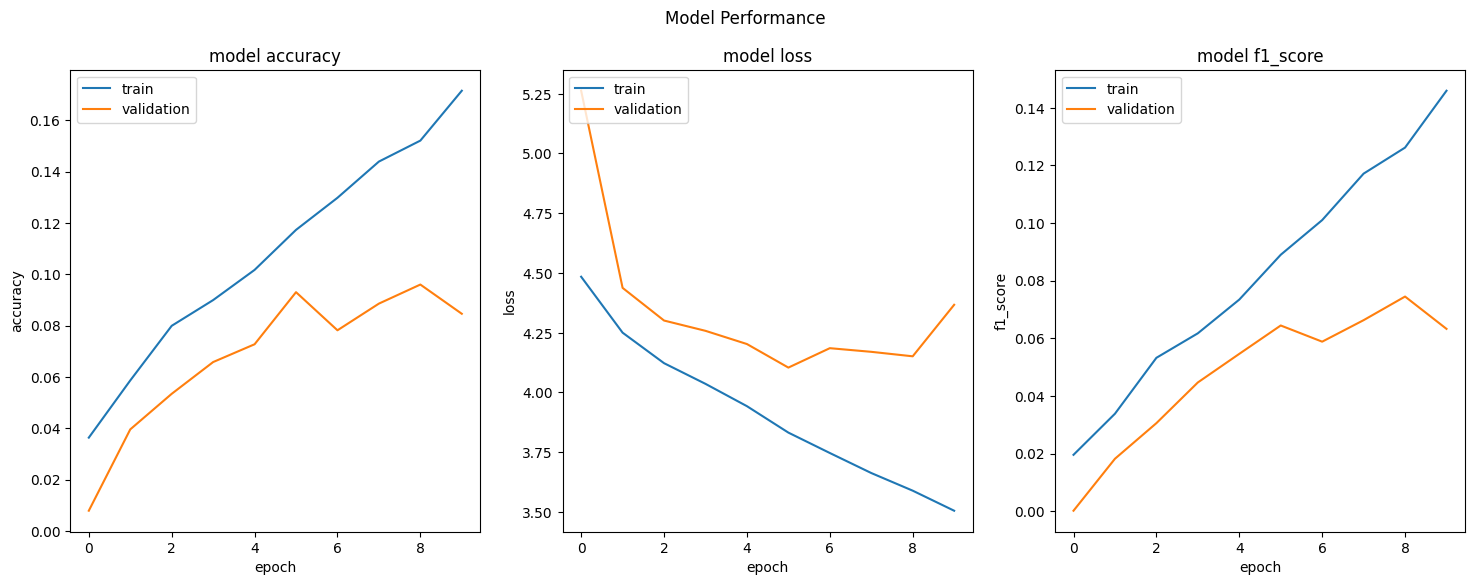

In [302]:
plot_model_performance(training_history_testfm, metrics_keys)

In [303]:
tf.saved_model.save(custom_food_subset_classifier, "../models/custom_food_subset_CNN/")

INFO:tensorflow:Assets written to: ../models/custom_food_subset_CNN/assets


INFO:tensorflow:Assets written to: ../models/custom_food_subset_CNN/assets


### c. Evaluating the Food Subset Classifier

In [304]:
y_pred_testfm = custom_food_subset_classifier.predict(X_test, batch_size=64, 
                                                        verbose=1)

 1/16 [>.............................] - ETA: 0s

16/16 [==============================] - 0s 20ms/step


In [305]:
y_pred_testfm = np.argmax(y_pred_testfm, axis=1)
y_test_testfm = np.argmax(y_test, axis=1)

In [234]:
# For Confusion Matrix Plot (Matrix is too big to have effective Viz)
# labels = train_labels.tolist()
# cmap = "Blues"

In [306]:
print(classification_report(y_test_testfm, y_pred_testfm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.03      0.10      0.05        10
           2       0.00      0.00      0.00        11
           3       0.12      0.14      0.13        14
           4       0.00      0.00      0.00        10
           5       0.08      0.05      0.06        20
           6       0.11      0.55      0.18        11
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       0.11      0.22      0.15         9
          12       0.04      0.08      0.05        12
          13       0.10      0.11      0.11         9
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00         9
          17       0.00    

## C. Custom CNN Model Classifier on the Complete Food Dataset

The code works without error for the data subset.<br>
The model is ready to be trained on the full food dataset

### a. Loading the Complete Food Dataset

Setting the constant parameters for training the full dataset

In [307]:
height = 224
width = 224
channels = 3
batch_size = 64
img_shape = (height, width, channels)
img_size = (height, width)

data_dir = "../data/food/images/"

Using ImageDataGenerator & flow_from_directory to use the full food dataset

In [308]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [312]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2,
        )

In [313]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    seed=10,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    seed=10,
    class_mode='categorical',
    subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


### b. Training Custom CNN on Complete Food Data

Setting the constant parameters for build the custom model

In [109]:
num_filters = 32
filter_size = (3, 3)
conv_activation = "relu"
input_shape = img_shape
max_pool_size = (2, 2)

hidden_activation = "relu"
output_activation = "softmax"
layer_1_neurons = 256
layer_2_neurons = 128
output_neurons = 101
num_epochs = 6

optimizer = tf.optimizers.legacy.Adam()
loss = 'categorical_crossentropy'
metrics = ["accuracy", tf.keras.metrics.F1Score(average='macro')]

In [110]:
custom_food_classifier = build_custom_CNN(num_filters, filter_size, conv_activation, input_shape, max_pool_size, layer_1_neurons, layer_2_neurons, output_neurons)

In [112]:
custom_food_classifier.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_15 (Ba  (None, 222, 222, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 batch_normalization_16 (Ba  (None, 109, 109, 32)      128       
 tchNormalization)                                               
                                                      

Training the custom CNN for just 6 epoch since each epoch is very time consuming.

In [113]:
training_history_fm1 = custom_food_classifier.fit(train_data, 
                                                    epochs=num_epochs,
                                                    validation_data=val_data, 
                                                    verbose=1
                                                )

Epoch 1/6
1263/1263 [==============================] - 1355s 1s/step - loss: 4.1657 - accuracy: 0.0731 - f1_score: 0.0567 - val_loss: 4.2714 - val_accuracy: 0.0750 - val_f1_score: 0.0517
Epoch 2/6
1263/1263 [==============================] - 1336s 1s/step - loss: 3.6880 - accuracy: 0.1417 - f1_score: 0.1197 - val_loss: 3.9741 - val_accuracy: 0.1027 - val_f1_score: 0.0755
Epoch 3/6
1263/1263 [==============================] - 1357s 1s/step - loss: 3.4478 - accuracy: 0.1820 - f1_score: 0.1614 - val_loss: 3.4381 - val_accuracy: 0.1850 - val_f1_score: 0.1631
Epoch 4/6
1263/1263 [==============================] - 1359s 1s/step - loss: 3.2526 - accuracy: 0.2164 - f1_score: 0.1980 - val_loss: 3.2627 - val_accuracy: 0.2190 - val_f1_score: 0.1991
Epoch 5/6
1263/1263 [==============================] - 1361s 1s/step - loss: 3.1012 - accuracy: 0.2476 - f1_score: 0.2314 - val_loss: 3.3632 - val_accuracy: 0.2168 - val_f1_score: 0.2066
Epoch 6/6
1263/1263 [==============================] - 1366s 1s/s

In [116]:
metrics_keys = ["accuracy", "loss", "f1_score"]

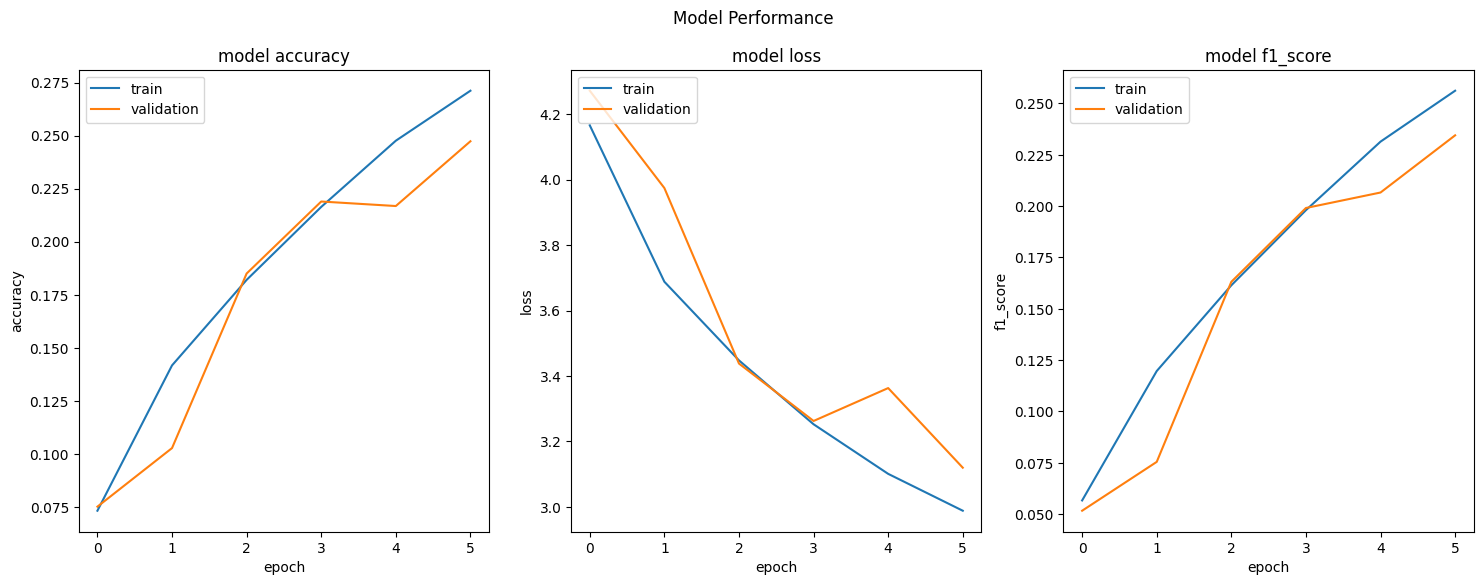

In [118]:
plot_model_performance(training_history_fm1, metrics_keys)

In [115]:
tf.saved_model.save(custom_food_classifier, "../models/custom_food_CNN/")

INFO:tensorflow:Assets written to: ../models/custom_food_CNN/assets


INFO:tensorflow:Assets written to: ../models/custom_food_CNN/assets


predicting the model on validation data

In [314]:
y_pred_customfm = custom_food_classifier.predict(val_data, batch_size=64, 
                                                        verbose=1)

316/316 [==============================] - 136s 429ms/step


Evaluating model on validation data since there is not test data available

In [315]:
result_customfm = custom_food_classifier.evaluate(val_data)

316/316 [==============================] - 146s 461ms/step - loss: 3.1153 - accuracy: 0.2477 - f1_score: 0.2360


## D. Applying Transfer Learning by using EfficientNetB0 Model

Now, trying a pretrained model for our classification purpose by transfer learning method.<br>
Using the same constant model parameters as for the custom model

In [316]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2,
        )

In [317]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    seed=10,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    seed=10,
    class_mode='categorical',
    subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


Using the EfficientNetB0 model for transfer learning

In [246]:
from tensorflow.keras.applications import EfficientNetB0

Function to build the CNN using tranfer learning

In [250]:
def transfer_CNN_model(drop_out_rate, max_pool_size, num_classes, optimizer, loss, metrics, input_shape):
    inputs = layers.Input(shape=input_shape)
    x = inputs
    
    model = EfficientNetB0(include_top=False, 
                           input_tensor=x, 
                           weights="imagenet")
    
    # Freezing the pretrained weights
    model.trainable = False

    # Rebuilding top layers
    x = layers.MaxPooling2D(max_pool_size)(model.output)
    x = layers.BatchNormalization()(x)

    x = layers.Dropout(drop_out_rate, name="top_dropout")(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = optimizer
    model.compile(
        optimizer=optimizer, loss=loss, metrics=metrics, run_eagerly=True
    )
    return model

Setting parameters to build the transfer learning model

In [251]:
drop_out_rate = 0.2
max_pool_size = (2, 2)
num_classes = len(train_data.class_indices)
input_shape = img_shape
optimizer = tf.optimizers.legacy.Adam()
loss = 'categorical_crossentropy'
metrics = ["accuracy", tf.keras.metrics.F1Score(average='macro')]

Building the transfer learning model

In [252]:
transfer_CNN = transfer_CNN_model(drop_out_rate, max_pool_size, num_classes, optimizer, loss, metrics, input_shape)

16705208/16705208 [==============================] - 0s 0us/step


In [253]:
transfer_CNN.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 tion)                                                                                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_2[0

Training the model for just 2 epochs as the training takes a lot of time

In [259]:
num_epochs = 2

In [261]:
training_history_transferfm = transfer_CNN.fit(train_data, 
                                               epochs=num_epochs,
                                               validation_data=val_data,
                                               verbose=1)

Epoch 1/2
1263/1263 [==============================] - 4702s 4s/step - loss: 5.9147 - accuracy: 0.0106 - f1_score: 0.0105 - val_loss: 4.9742 - val_accuracy: 0.0135 - val_f1_score: 6.4262e-04
Epoch 2/2
1263/1263 [==============================] - 5194s 4s/step - loss: 4.8969 - accuracy: 0.0114 - f1_score: 0.0111 - val_loss: 4.6443 - val_accuracy: 0.0107 - val_f1_score: 8.6280e-04


In [262]:
metrics_keys = ["accuracy", "loss", "f1_score"]

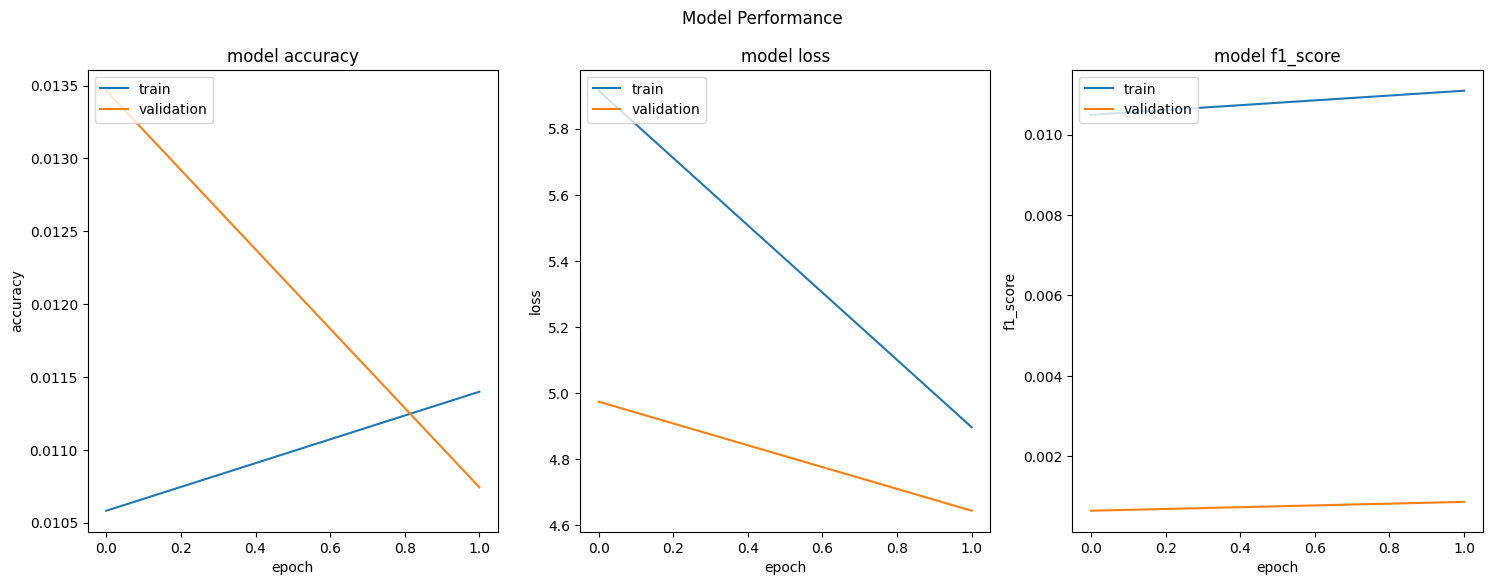

In [263]:
plot_model_performance(training_history_transferfm, metrics_keys)

In [264]:
tf.saved_model.save(transfer_CNN, "../models/transfer_CNN/")

INFO:tensorflow:Assets written to: ../models/transfer_CNN/assets


INFO:tensorflow:Assets written to: ../models/transfer_CNN/assets


predicting the model on validation data

In [318]:
y_pred_transferfm = transfer_CNN.predict(val_data, batch_size=64, 
                                                    verbose=1)

316/316 [==============================] - 267s 843ms/step


Evaluating model on validation data since there is not test data available

In [319]:
result_transferfm = transfer_CNN.evaluate(val_data)

316/316 [==============================] - 254s 800ms/step - loss: 4.6444 - accuracy: 0.0108 - f1_score: 9.0136e-04


## E. Comparing Custom CNN with Transfer Learning Model

1. The training accuracy of custom CNN classifier is 0.1417 whereas that of transfer CNN classifier is 0.0114.
2. The validation accuracy of custom CNN classifier is 0.1027 whereas that of transfer CNN classifier is 0.0107.
3. The training f1 score of custom CNN classifier is 0.1197 whereas that of transfer CNN classifier is 0.0111.
4. The validation f1 score of custom CNN classifier is 0.0755 whereas that of transfer CNN classifier is 8.6280e-04.

### The evaluation of models on validation data 
6. The custom CNN model performed with accuracy: 0.2477 & f1_score: 0.2360
7. The transfer CNN model performed with accuracy: 0.0108 & f1_score: 9.0136e-04

8. We can clearly see that the custom CNN model is performing better than the transfer CNN model.
9. Ideally I would also train both the model for more epochs to improve their performance.
10. Additionally, to improve the performance of transfer CNN model we can fine tune it by adding more dense fully connected layers at the top before the output layer.